In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Load the Dataset
df = pd.read_csv('social_media_viral_content_dataset.csv')

In [8]:
df

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,15800,861,0.0598,0.464,1
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,11289,54887,0.0695,-0.800,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,47196,44132,0.1702,0.416,0
3,SM_100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,5316,83105,0.0903,0.223,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,SM_101995,YouTube Shorts,text,Sports,es,US,2024-02-11 00:00:00,#funny #music #ai,14112183,486627,9430,91550,0.0416,-0.541,1
1996,SM_101996,Instagram,text,Politics,en,Brazil,2024-02-12 00:00:00,#viral #trending,5604744,467062,2764,16092,0.0867,0.287,1
1997,SM_101997,X,carousel,Education,ur,UK,2024-05-01 00:00:00,#trending #fyp,2031920,253990,40963,95697,0.1923,0.604,1
1998,SM_101998,X,carousel,Sports,ur,UK,2024-12-23 00:00:00,#funny #trending #tech,5237350,209494,15042,67422,0.0557,-0.861,1


In [10]:
print(df.head(5))

     post_id        platform content_type       topic language  region  \
0  SM_100000       Instagram         text      Sports       ur      UK   
1  SM_100001       Instagram     carousel      Sports       ur  Brazil   
2  SM_100002  YouTube Shorts        video  Technology       ur      UK   
3  SM_100003               X         text    Politics       ur      US   
4  SM_100004  YouTube Shorts         text   Education       es      US   

         post_datetime                         hashtags    views   likes  \
0  2024-12-10 00:00:00              #tech #funny #music  2319102  122058   
1  2024-10-13 00:00:00  #news #fyp #funny #ai #trending  2538464  110368   
2  2024-05-03 00:00:00                        #ai #news  1051176   87598   
3  2024-08-04 00:00:00                       #ai #funny  5271440  329465   
4  2024-03-28 00:00:00     #news #ai #viral #funny #fyp  3186256  199141   

   comments  shares  engagement_rate  sentiment_score  is_viral  
0     15800     861           0.

In [11]:
print(df.tail(5))

        post_id        platform content_type      topic language    region  \
1995  SM_101995  YouTube Shorts         text     Sports       es        US   
1996  SM_101996       Instagram         text   Politics       en    Brazil   
1997  SM_101997               X     carousel  Education       ur        UK   
1998  SM_101998               X     carousel     Sports       ur        UK   
1999  SM_101999               X     carousel   Politics       ur  Pakistan   

            post_datetime                hashtags     views   likes  comments  \
1995  2024-02-11 00:00:00       #funny #music #ai  14112183  486627      9430   
1996  2024-02-12 00:00:00        #viral #trending   5604744  467062      2764   
1997  2024-05-01 00:00:00          #trending #fyp   2031920  253990     40963   
1998  2024-12-23 00:00:00  #funny #trending #tech   5237350  209494     15042   
1999  2024-11-04 00:00:00           #viral #funny   3369429  481347     13455   

      shares  engagement_rate  sentiment_sco

In [12]:
# Task 2: Data Inspection
print(df.columns)

Index(['post_id', 'platform', 'content_type', 'topic', 'language', 'region',
       'post_datetime', 'hashtags', 'views', 'likes', 'comments', 'shares',
       'engagement_rate', 'sentiment_score', 'is_viral'],
      dtype='object')


In [13]:
print(df.dtypes)

post_id             object
platform            object
content_type        object
topic               object
language            object
region              object
post_datetime       object
hashtags            object
views                int64
likes                int64
comments             int64
shares               int64
engagement_rate    float64
sentiment_score    float64
is_viral             int64
dtype: object


In [14]:
print("\n--- Missing Values Per Column ---")
missing_counts = df.isnull().sum()
print(missing_counts)


--- Missing Values Per Column ---
post_id            0
platform           0
content_type       0
topic              0
language           0
region             0
post_datetime      0
hashtags           0
views              0
likes              0
comments           0
shares             0
engagement_rate    0
sentiment_score    0
is_viral           0
dtype: int64


In [15]:
# 1. Select a numerical column ( 'content_type' or 'topic')
target_col = 'content_type'

In [31]:
target_col

'content_type'

Column 'content_type' not found. Using 'Date' instead.
Using column: Date


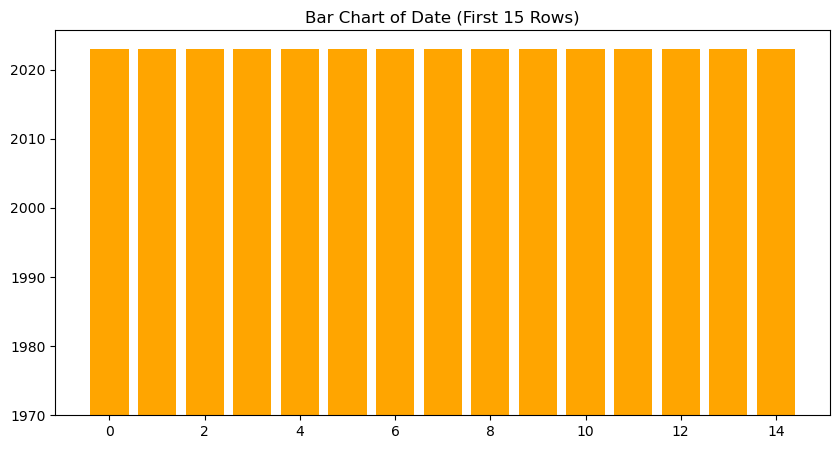

In [35]:
 
if 'content_type' in df.columns:
    target_col = 'content_type'
else:
    # Use a column that does exist in the DataFrame
    # For example, using the first column as a fallback
    target_col = df.columns[0]
    print(f"Column 'content_type' not found. Using '{target_col}' instead.")

# Bar Chart: First 15 entries for readability
plt.figure(figsize=(10, 5))
plt.bar(df.index[:15], df[target_col][:15], color='orange')
plt.title(f'Bar Chart of {target_col} (First 15 Rows)')
print(f"Using column: {target_col}")

In [33]:
data_array

array(['text', 'carousel', 'video', ..., 'carousel', 'carousel',
       'carousel'], dtype=object)

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 1. Create synthetic data
# Generate a range of 30 dates starting from 2026-01-01
dates = pd.date_range(start='2023-01-01', periods=30, freq='D')

# Generate a random walk for the numerical variable
# np.random.randn creates random values, and cumsum() accumulates them over time
values = np.cumsum(np.random.randn(30)) + 100 

# Store in a DataFrame
df = pd.DataFrame({'Date': dates, 'Value': values})

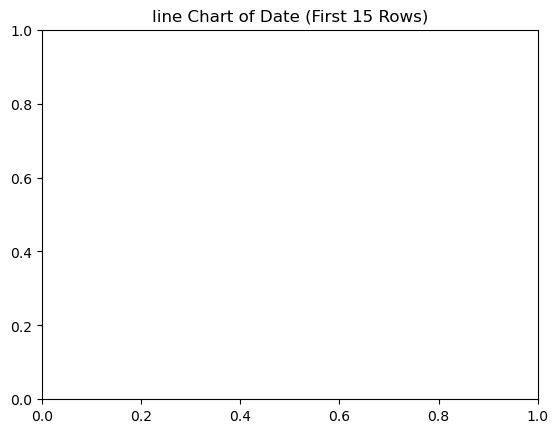

<Figure size 1000x500 with 0 Axes>

In [48]:
plt.title(f'line Chart of {target_col} (First 15 Rows)')
plt.figure(figsize=(10, 5))
plt.show()